# DATA MINING PROJECT

In [62]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Kaan-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kaan-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### REAL POSITIVE PART

In [58]:
real_positive = Path('opinion_spam/positive/truthful')
real_positive_files = files = real_positive.iterdir()
real_positive_text = ""

for index,file in enumerate(real_positive_files, start=0):
    reader = open(file,"r")
    text = reader.read().lower()
    real_positive_text += " "+text

#### Tokenization

In [68]:
tokenized_text = word_tokenize(real_positive_text)
print("Length of Real Positive Document: "+str(len(tokenized_text)))

Length of Real Positive Document: 56059


#### Stop Word Cleaning

In [69]:
stop_words = set(stopwords.words("english"))
tokenized_text = [x for x in tokenized_text if x not in stop_words]
print("Length after stop word clean: "+str(len(tokenized_text)))

Length after stop word clean: 32231


#### Stemming

In [72]:
stemmed_words = []
ps = PorterStemmer()
for word in tokenized_text:
    new_word = ps.stem(word)
    stemmed_words.append(new_word)

#### Frequency Distance (Like Bag-Of-Words)

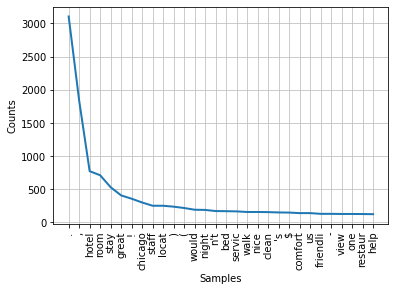

Number of Features: 3335


In [73]:
fdist = FreqDist(stemmed_words)
fdist.plot(30,cumulative=False)
plt.show()
print("Number of Features: "+ str(len(fdist)))

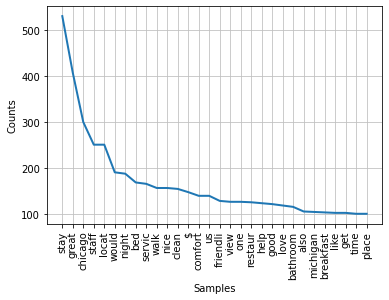

Features Length:3320


In [74]:
new_filters = ['.',',','hotel','room','!',')','(','n\'t','\'s','-']
for x in new_filters:
    stop_words.add(x)

stemmed_words = [x for x in stemmed_words if x not in stop_words]
fdist = FreqDist(stemmed_words)
fdist.plot(30,cumulative=False)
plt.show()
print("Features Length:" + str(len(fdist)))